<a href="https://colab.research.google.com/github/preetamjumech/LLM/blob/main/RAG_Colpali_Retrieval_from_pdf_04_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade byaldi

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:0

In [2]:
!sudo apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 2s (120 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 123623 

In [3]:
!pip install -q git+https://github.com/huggingface/transformers.git flash-attn optimum auto-gptq bitsandbytes

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for f

In [4]:
import base64
import os
from byaldi import RAGMultiModalModel

In [5]:
RAG = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose=1)

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

In [6]:
!wget https://arxiv.org/pdf/1706.03762
!mkdir docs
!mv 1706.03762 docs/attention.pdf

--2024-11-04 17:38:32--  https://arxiv.org/pdf/1706.03762
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.131.42, 151.101.195.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘1706.03762’

1706.03762          100%[===================>]   2.11M  --.-KB/s    in 0.01s   

2024-11-04 17:38:32 (192 MB/s) - ‘1706.03762’ saved [2215244/2215244]



In [8]:
RAG.index(
    input_path = "./docs/attention.pdf",
    index_name = "attention",
    store_collection_with_index= True,
    overwrite= True
)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 1 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 2 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 3 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 4 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 5 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 6 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 7 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 8 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 9 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 10 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 11 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 12 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 13 of document 0 to index.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Index exported to .byaldi/attention
Index exported to .byaldi/attention


{0: 'docs/attention.pdf'}

In [9]:
query = "What is the BLUE score for the transformer base model?"

In [10]:
results = RAG.search(query, k = 1)

In [11]:
results

[{'doc_id': 0, 'page_num': 8, 'score': 17.125, 'metadata': {}, 'base64': 'iVBORw0KGgoAAAANSUhEUgAABqQAAAiYCAIAAAA+NVHkAAEAAElEQVR4nOzdd1gUx/8H8KGDoCJNwY4gdkDs2MFoxIZiV+wNu9HERI36tcWOvaAiKqJYMRbsiihiBwXpqDRBpHe4298f82Se/d0dx9LUXN6vP3i4uS2zu7Ozu5+bnVHiOI4AAAAAAAAAAADAv5/y984AAAAAAAAAAAAAVA0E+wAAAAAAAAAAABQEgn0AAAAAAAAAAAAKAsE+AAAAAAAAAAAABYFgHwAAAAAAAAAAgIJAsA8AAAAAAAAAAEBBINgHAAAAAAAAAACgIBDsAwAAAAAAAAAAUBAI9gEAAAAAAAAAACgIBPsAAAAAAAAAAAAUBIJ9AAAAAAAAAAAACgLBPgAAAAAAAAAAAAWBYB8AAAAAAAAAAICCQLAPAAAAAAAAAABAQSDYBwAAAAAAAAAAoCAQ7AMAAAAAAAAAAFAQCPYBAAAAAAAAAAAoCAT7AAAAAAAAAAAAFASCfQAAAAAAAAAAAAoCwT4AAAAAAAAAAAAFgWAfAAAAAAAAAACAgkCwDwAAAAAAAAAAQEEg2AcAAAAAAAAAAKAgEOwDAAAAAAAAAABQEAj2AQAAAAAAAAAAKAgE+wAAAAAAAAAAABQEgn0AAAAAAAAAAAAKAsE+AAAAAAAAAAAABYFgHwAAAAAAAAAAgIJAsA8AAAAAAAAAAEBBINgHAAAAAAAAAACgIBDsAwAAAAAAAAAAUBAI9gEAAAAAAAAAACgIBPsAAAAAAAAAAAAUBIJ9AAAAAAAAAAAACgLBPgAAAAAAAAAAAAWBYB8AAAAAAAAAAICCQLAPAAAAAAAAAABAQSDYBwAAAAAAAAAAoCAQ7AMAAAAAAAAAAFAQCPYBAAAAAAAAAAAoCAT7AAAAAAAAAAAAFASCfQAAAA

In [12]:
image_bytes = base64.b64decode(results[0]['base64'])

In [13]:
image_bytes

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\xa4\x00\x00\x08\x98\x08\x02\x00\x00\x00>5Q\xe4\x00\x01\x00\x00IDATx\x9c\xec\xddwX\x14\xc7\xff\x07\xf0\xa1\x83\xa0"M\xc1\x8e v@\xec\xd8\xc1h\xc4\x86bW\xec\r\xbb\xd1\xc4D\x8d\xfa\xb5\xc5\x8e\xbd\xa0"*\xa2X1\x16\xec\x8a(b\x07\x05\xe9\xa84A\xa4w\xb8\xdb\xdf\x1f\xf3d\x9e\xfd\xdd\x1d\xc7\xd2\xd4\\\xde\xaf?x\xb8\xb9-\xb3\xbb\xb3\xb3\xbb\x9f\x9b\x9dQ\xe28\x8e\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\xbf\x9f\xf2\xf7\xce\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00T\r\x04\xfb\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\x04\x82}\x00\x00\x00\x00\x00\x00\x00\x00\x00\n\x02\xc1>\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x81`\x1f\x00\x00\x00\x00\x00\x00\x00\x00\x80\x82@\xb0\x0f\x00\x00\x00\x00\x00\x00\x00\x00@A \xd8\x07\x00\x00\x00\x00\x00\x00\x00\x00\xa0 \x10\xec\x03\x00\x00\x00\x00\x00\x00\x00\x00P\x10\x08\xf6\x01\x00\x00\x00\x00\x00\x00\x00\x00(\x08\x04\xfb\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\x04\x82}\x00\x00\x00\x00\x00\x00\x00\x00\x00\n\x02\xc1>\x00\x00\x

In [14]:
file_name = "image.jpg"
with open(file_name, "wb") as f:
    f.write(image_bytes)

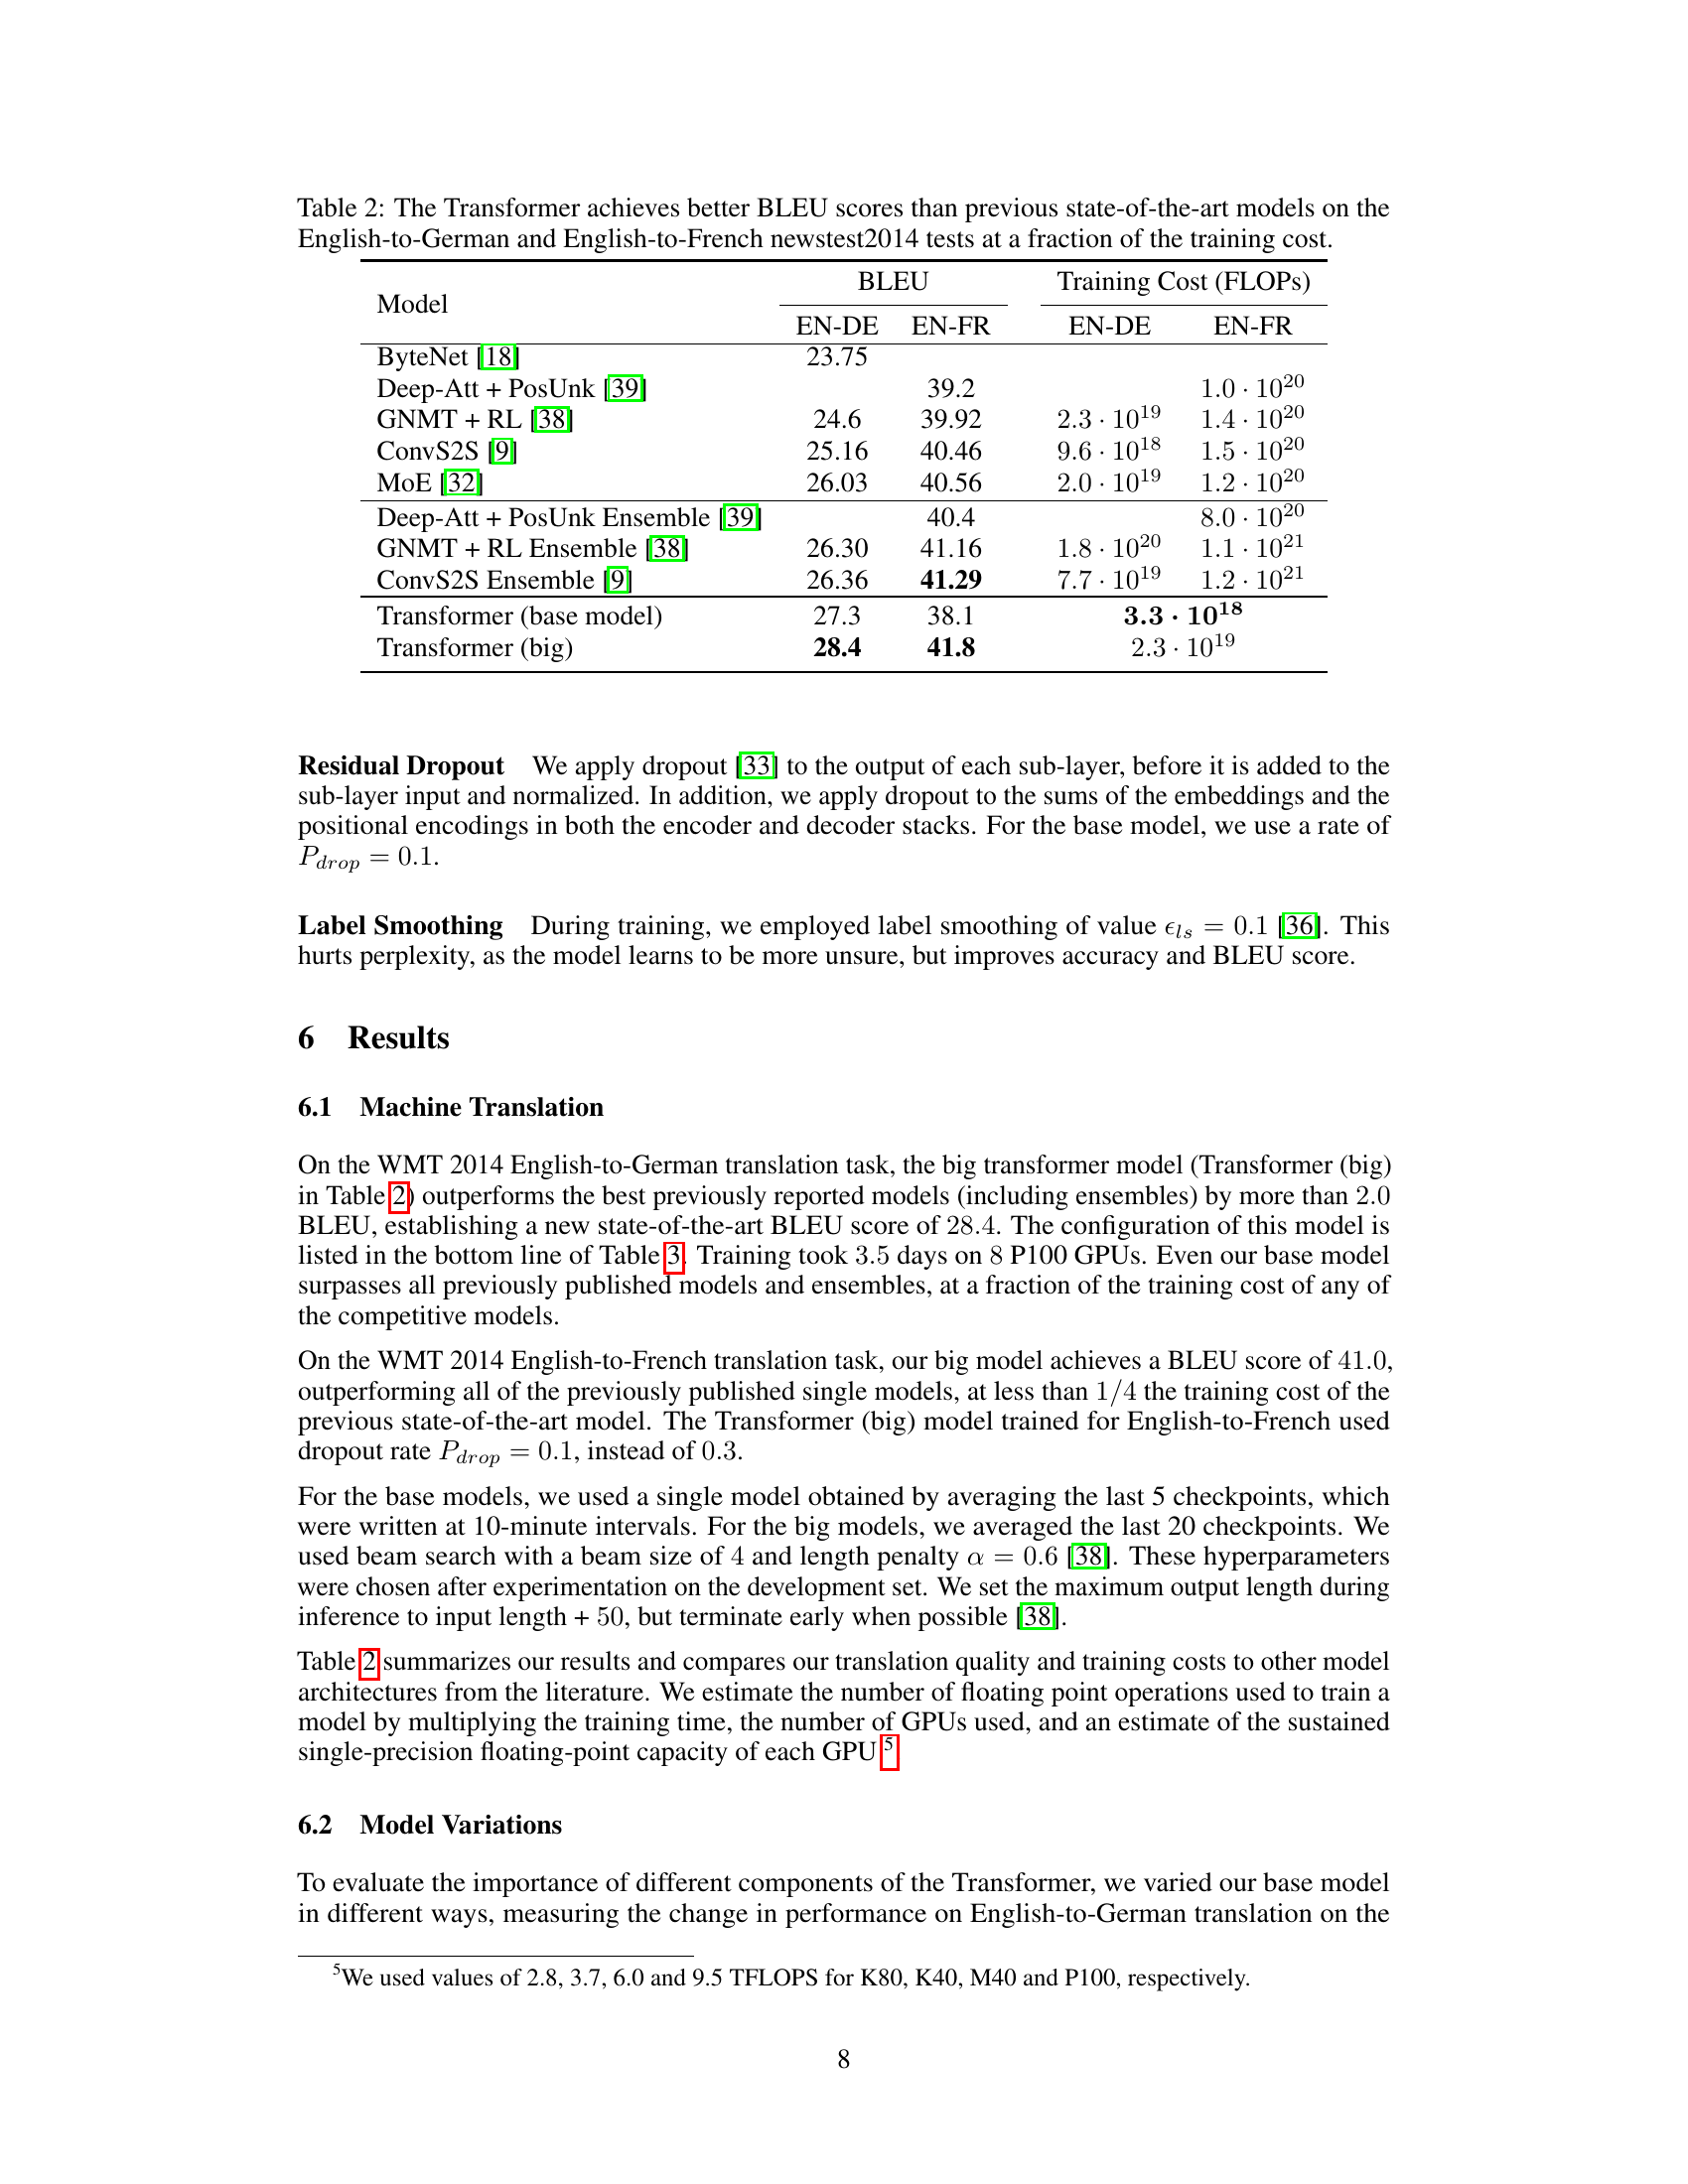

In [16]:
from IPython.display import Image
display(Image(filename=file_name))